# Save/load street network models to/from disk

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  
This notebook demonstrates how to save networks to disk as shapefiles, geopackages, graphml, and xml, and how to load an OSMnx-created network from a graphml file.

In [2]:
import numpy as np
import pandas as pd
import osmnx as ox
import networkx as nx
from geopandas import gpd
from osmnx import graph_to_gdfs, gdfs_to_graph, save_and_show, get_paths_to_simplify
from shapely.geometry import Point, LineString, shape, MultiPoint, box, Polygon, MultiLineString, mapping
from shapely.ops import linemerge
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

ImportError: cannot import name 'gdfs_to_graph' from 'osmnx' (/home/trottdw/.local/lib/python3.8/site-packages/osmnx/__init__.py)

In [3]:
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

In [4]:
# get a network
place = "Tehran, Iran"
G = ox.graph_from_place(place, network_type="drive")

## Shapefiles and GeoPackages for GIS

In [3]:
# save graph as a geopackage
# you can similarly save it as a shapefile, if you prefer obsolete formats
ox.save_graph_geopackage(G, filepath="./data/iran.gpkg")

## GraphML files for saving network and preserving topological detail

In [4]:
# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later
filepath = "./data/iran.graphml"
ox.save_graphml(G, filepath)
G = ox.load_graphml(filepath)

In [5]:
# if you want to work with your model in gephi, use gephi compatibility mode
ox.save_graphml(G, filepath=filepath, gephi=True)

## SVG file to work with in Adobe Illustrator

In [6]:
# save street network as SVG
fig, ax = ox.plot_graph(G, show=False, save=True, close=True, filepath="./images/iran.svg")

## Save points of interest or building footprints

In [7]:
# get all "amenities" and save as a geopackage via geopandas
gdf = ox.geometries_from_place(place, tags={"amenity": True})
gdf = gdf.apply(lambda c: c.astype(str) if c.name != "geometry" else c, axis=0)
gdf.to_file("./data/pois.gpkg", driver="GPKG")

CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "pois" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "pois" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'


RuntimeError: GDAL Error: sqlite3_exec(CREATE TABLE "pois" ( "fid" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "geom" GEOMETRY, "element_type" TEXT, "osmid" INTEGER, "amenity" TEXT, "name" TEXT, "access" TEXT, "unisex" TEXT, "dispensing" TEXT, "healthcare" TEXT, "name:en" TEXT, "opening_hours" TEXT, "brand" TEXT, "brand:en" TEXT, "brand:wikidata" TEXT, "brand:wikipedia" TEXT, "cuisine" TEXT, "created_by" TEXT, "surface" TEXT, "fuel:cng" TEXT, "fuel:diesel" TEXT, "fuel:petrol" TEXT, "name:fa" TEXT, "addr:street" TEXT, "website" TEXT, "atm" TEXT, "branch" TEXT, "branch_code" TEXT, "branch_code:fa" TEXT, "branch_name:fa" TEXT, "phone" TEXT, "bus" TEXT, "public_transport" TEXT, "operator" TEXT, "fee" TEXT, "building" TEXT, "denomination" TEXT, "place_of_worship" TEXT, "religion" TEXT, "full_name" TEXT, "payment:cash" TEXT, "payment:debit_cards" TEXT, "parking" TEXT, "self_service" TEXT, "barrier" TEXT, "note" TEXT, "int_name" TEXT, "check_date" TEXT, "fuel" TEXT, "alt_name" TEXT, "wifi" TEXT, "community_centre" TEXT, "contact:phone" TEXT, "wikidata" TEXT, "wikipedia" TEXT, "addr:city" TEXT, "emergency" TEXT, "smoking" TEXT, "shop" TEXT, "name:" TEXT, "fuel:HGV_diesel" TEXT, "email" TEXT, "internet_access" TEXT, "addr:housename" TEXT, "addr:housenumber" TEXT, "source" TEXT, "level" TEXT, "wheelchair" TEXT, "shelter" TEXT, "tactile_paving" TEXT, "studio" TEXT, "payment:cards" TEXT, "addr:district" TEXT, "addr:zone" TEXT, "takeaway" TEXT, "drive_through" TEXT, "branch:type" TEXT, "office" TEXT, "source:name" TEXT, "entrance" TEXT, "payment:electronic_purses" TEXT, "payment:telephone_cards" TEXT, "addr:postcode" TEXT, "description" TEXT, "highway" TEXT, "name:pl" TEXT, "old_name" TEXT, "delivery" TEXT, "contact:facebook" TEXT, "contact:instagram" TEXT, "user_defined_other" TEXT, "capacity" TEXT, "female" TEXT, "vending" TEXT, "park_ride" TEXT, "bench" TEXT, "bicycle_parking" TEXT, "bin" TEXT, "bus_bay" TEXT, "covered" TEXT, "departure_board" TEXT, "handrail" TEXT, "lit" TEXT, "passenger_information_display" TEXT, "ref" TEXT, "seats" TEXT, "type" TEXT, "operator:en" TEXT, "diet:vegetarian" TEXT, "outdoor_seating" TEXT, "disused" TEXT, "contact:website" TEXT, "departures_board" TEXT, "supervised" TEXT, "name:sv" TEXT, "opening_hours:covid19" TEXT, "toilets:access" TEXT, "healthcare:speciality" TEXT, "image" TEXT, "mapillary" TEXT, "network" TEXT, "cuisine_1" TEXT, "cuisine_2" TEXT, "cuisine_3" TEXT, "name:de" TEXT, "male" TEXT, "name:zh" TEXT, "abandoned:amenity" TEXT, "government" TEXT, "social_facility" TEXT, "name:ar" TEXT, "diet:vegan" TEXT, "contact:email" TEXT, "currency:irr" TEXT, "currency:IRR" TEXT, "currency:others" TEXT, "name:eo" TEXT, "name:tr" TEXT, "name:nl" TEXT, "name:it" TEXT, "name:es" TEXT, "toilets:disposal" TEXT, "phone_1" TEXT, "indoor" TEXT, "contact:mobile" TEXT, "internet_access:fee" TEXT, "payment:mastercard" TEXT, "payment:visa" TEXT, "shelter_type" TEXT, "recycling_type" TEXT, "code" TEXT, "location" TEXT, "layer" TEXT, "addr:country" TEXT, "nat_name" TEXT, "ele" TEXT, "payment:coins" TEXT, "payment:credit_cards" TEXT, "start_date" TEXT, "payment:bitcoin" TEXT, "cash_in" TEXT, "tourism" TEXT, "fixme" TEXT, "automated" TEXT, "isced:level" TEXT, "name:ru" TEXT, "bicycle" TEXT, "foot" TEXT, "motorcar" TEXT, "motorcycle" TEXT, "fax" TEXT, "name:fr" TEXT, "status" TEXT, "police" TEXT, "drinking_water" TEXT, "man_made" TEXT, "screen" TEXT, "alt_name:en" TEXT, "historic" TEXT, "backrest" TEXT, "air_conditioning" TEXT, "toilets:wheelchair" TEXT, "service_times" TEXT, "internet_access:type" TEXT, "currency:ریال" TEXT, "addr:unit" TEXT, "comment" TEXT, "disused:amenity" TEXT, "place_of_worship:type" TEXT, "exit" TEXT, "facebook" TEXT, "name_1" TEXT, "operator:type" TEXT, "health_specialty:implant_dentistry" TEXT, "name:ko" TEXT, "internet_access:ssid" TEXT, "reservation" TEXT, "name:ja" TEXT, "addr:city:en" TEXT, "addr:full" TEXT, "addr:housenumber:en" TEXT, "addr:province" TEXT, "addr:province:en" TEXT, "addr:street:en" TEXT, "name_ref" TEXT, "fuel:octane_87" TEXT, "changing_table" TEXT, "place" TEXT, "addr:street_1" TEXT, "addr:street_2" TEXT, "addr:street_3" TEXT, "addr:street_4" TEXT, "address" TEXT, "elevator" TEXT, "ramp:wheelchair" TEXT, "language:de" TEXT, "collection_times" TEXT, "material" TEXT, "pizza" TEXT, "indoor_seating" TEXT, "diet:halal" TEXT, "diet:meat" TEXT, "Id" TEXT, "rampDisability" TEXT, "region" TEXT, "zone" TEXT, "address:district" TEXT, "address:street" TEXT, "address:zone" TEXT, "toilets:num_chambers" TEXT, "culture" TEXT, "facilities" TEXT, "mahale" TEXT, "bar" TEXT, "business" TEXT, "theatre:type" TEXT, "toilets:handwashing" TEXT, "window" TEXT, "restaurant" TEXT, "memorial" TEXT, "height" TEXT, "stars" TEXT, "language:per" TEXT, "language:en" TEXT, "language:fa" TEXT, "language:fr" TEXT, "language:tr" TEXT, "language:es" TEXT, "language:gr" TEXT, "language:it" TEXT, "language:ru" TEXT, "addr:place" TEXT, "leisure" TEXT, "telephone" TEXT, "bottle" TEXT, "opening_hours:url" TEXT, "rating" TEXT, "community_centre:for" TEXT, "craft" TEXT, "musical_instrument" TEXT, "twitter" TEXT, "alt_name:fa" TEXT, "bic" TEXT, "speciality" TEXT, "natural" TEXT, "diet:dairy_free" TEXT, "diet:gluten_free" TEXT, "phone:mobile" TEXT, "baby_feeding" TEXT, "survey:date" TEXT, "contact:fax" TEXT, "preschool" TEXT, "mobile_phone:repair" TEXT, "currency:EUR" TEXT, "currency:USD" TEXT, "contact:telegram" TEXT, "building:levels" TEXT, "grades" TEXT, "cash_withdrawal" TEXT, "changing_table:fee" TEXT, "diaper" TEXT, "kids_area" TEXT, "opening_hours:kitchen" TEXT, "toilets" TEXT, "currency:ETH" TEXT, "currency:XBT" TEXT, "school" TEXT, "language:pr" TEXT, "bath:type" TEXT, "nodes" TEXT, "coronaquarantine" TEXT, "building:height" TEXT, "faculty" TEXT, "roof:shape" TEXT, "short_name" TEXT, "route_ref" TEXT, "loc_name" TEXT, "landuse" TEXT, "fuel:octane_91" TEXT, "abandoned" TEXT, "tomb" TEXT, "subway" TEXT, "taxi" TEXT, "name:tk" TEXT, "building:levels:underground" TEXT, "maxstay" TEXT, "fuel:octane_80" TEXT, "building:part" TEXT, "parking_space" TEXT, "fuel:octane_95" TEXT, "fuel:octane_98" TEXT, "area" TEXT, "building:colour" TEXT, "building:roof:shape" TEXT, "roof:colour" TEXT, "fuel:benzin" TEXT, "diet:egg_free" TEXT, "diet:kosher" TEXT, "wall" TEXT, "name:hy" TEXT, "fuel:gasoline" TEXT, "restriction" TEXT, "power_supply" TEXT, "industrial" TEXT, "social_facility:for" TEXT, "water" TEXT, "private" TEXT, "Perimeter" TEXT, "addr:neighbourhood" TEXT, "max_age" TEXT, "min_age" TEXT, "ruins" TEXT, "capacity:disabled" TEXT, "bath:open_air" TEXT, "instagram" TEXT, "building:use" TEXT, "amenity_1" TEXT, "ways" TEXT)) failed: duplicate column name: currency:IRR 
 
 Failed to write record: {'id': '0', 'type': 'Feature', 'properties': {'Id': 'nan', 'Perimeter': 'nan', 'abandoned': 'nan', 'abandoned:amenity': 'nan', 'access': 'nan', 'addr:city': 'nan', 'addr:city:en': 'nan', 'addr:country': 'nan', 'addr:district': 'nan', 'addr:full': 'nan', 'addr:housename': 'nan', 'addr:housenumber': 'nan', 'addr:housenumber:en': 'nan', 'addr:neighbourhood': 'nan', 'addr:place': 'nan', 'addr:postcode': 'nan', 'addr:province': 'nan', 'addr:province:en': 'nan', 'addr:street': 'nan', 'addr:street:en': 'nan', 'addr:street_1': 'nan', 'addr:street_2': 'nan', 'addr:street_3': 'nan', 'addr:street_4': 'nan', 'addr:unit': 'nan', 'addr:zone': 'nan', 'address': 'nan', 'address:district': 'nan', 'address:street': 'nan', 'address:zone': 'nan', 'air_conditioning': 'nan', 'alt_name': 'nan', 'alt_name:en': 'nan', 'alt_name:fa': 'nan', 'amenity': 'toilets', 'amenity_1': 'nan', 'area': 'nan', 'atm': 'nan', 'automated': 'nan', 'baby_feeding': 'nan', 'backrest': 'nan', 'bar': 'nan', 'barrier': 'nan', 'bath:open_air': 'nan', 'bath:type': 'nan', 'bench': 'nan', 'bic': 'nan', 'bicycle': 'nan', 'bicycle_parking': 'nan', 'bin': 'nan', 'bottle': 'nan', 'branch': 'nan', 'branch:type': 'nan', 'branch_code': 'nan', 'branch_code:fa': 'nan', 'branch_name:fa': 'nan', 'brand': 'nan', 'brand:en': 'nan', 'brand:wikidata': 'nan', 'brand:wikipedia': 'nan', 'building': 'nan', 'building:colour': 'nan', 'building:height': 'nan', 'building:levels': 'nan', 'building:levels:underground': 'nan', 'building:part': 'nan', 'building:roof:shape': 'nan', 'building:use': 'nan', 'bus': 'nan', 'bus_bay': 'nan', 'business': 'nan', 'capacity': 'nan', 'capacity:disabled': 'nan', 'cash_in': 'nan', 'cash_withdrawal': 'nan', 'changing_table': 'nan', 'changing_table:fee': 'nan', 'check_date': 'nan', 'code': 'nan', 'collection_times': 'nan', 'comment': 'nan', 'community_centre': 'nan', 'community_centre:for': 'nan', 'contact:email': 'nan', 'contact:facebook': 'nan', 'contact:fax': 'nan', 'contact:instagram': 'nan', 'contact:mobile': 'nan', 'contact:phone': 'nan', 'contact:telegram': 'nan', 'contact:website': 'nan', 'coronaquarantine': 'nan', 'covered': 'nan', 'craft': 'nan', 'created_by': 'nan', 'cuisine': 'nan', 'cuisine_1': 'nan', 'cuisine_2': 'nan', 'cuisine_3': 'nan', 'culture': 'nan', 'currency:ETH': 'nan', 'currency:EUR': 'nan', 'currency:IRR': 'nan', 'currency:USD': 'nan', 'currency:XBT': 'nan', 'currency:irr': 'nan', 'currency:others': 'nan', 'currency:ریال': 'nan', 'delivery': 'nan', 'denomination': 'nan', 'departure_board': 'nan', 'departures_board': 'nan', 'description': 'nan', 'diaper': 'nan', 'diet:dairy_free': 'nan', 'diet:egg_free': 'nan', 'diet:gluten_free': 'nan', 'diet:halal': 'nan', 'diet:kosher': 'nan', 'diet:meat': 'nan', 'diet:vegan': 'nan', 'diet:vegetarian': 'nan', 'dispensing': 'nan', 'disused': 'nan', 'disused:amenity': 'nan', 'drinking_water': 'nan', 'drive_through': 'nan', 'ele': 'nan', 'element_type': 'node', 'elevator': 'nan', 'email': 'nan', 'emergency': 'nan', 'entrance': 'nan', 'exit': 'nan', 'facebook': 'nan', 'facilities': 'nan', 'faculty': 'nan', 'fax': 'nan', 'fee': 'nan', 'female': 'nan', 'fixme': 'nan', 'foot': 'nan', 'fuel': 'nan', 'fuel:HGV_diesel': 'nan', 'fuel:benzin': 'nan', 'fuel:cng': 'nan', 'fuel:diesel': 'nan', 'fuel:gasoline': 'nan', 'fuel:octane_80': 'nan', 'fuel:octane_87': 'nan', 'fuel:octane_91': 'nan', 'fuel:octane_95': 'nan', 'fuel:octane_98': 'nan', 'fuel:petrol': 'nan', 'full_name': 'nan', 'government': 'nan', 'grades': 'nan', 'handrail': 'nan', 'health_specialty:implant_dentistry': 'nan', 'healthcare': 'nan', 'healthcare:speciality': 'nan', 'height': 'nan', 'highway': 'nan', 'historic': 'nan', 'image': 'nan', 'indoor': 'nan', 'indoor_seating': 'nan', 'industrial': 'nan', 'instagram': 'nan', 'int_name': 'nan', 'internet_access': 'nan', 'internet_access:fee': 'nan', 'internet_access:ssid': 'nan', 'internet_access:type': 'nan', 'isced:level': 'nan', 'kids_area': 'nan', 'landuse': 'nan', 'language:de': 'nan', 'language:en': 'nan', 'language:es': 'nan', 'language:fa': 'nan', 'language:fr': 'nan', 'language:gr': 'nan', 'language:it': 'nan', 'language:per': 'nan', 'language:pr': 'nan', 'language:ru': 'nan', 'language:tr': 'nan', 'layer': 'nan', 'leisure': 'nan', 'level': 'nan', 'lit': 'nan', 'loc_name': 'nan', 'location': 'nan', 'mahale': 'nan', 'male': 'nan', 'man_made': 'nan', 'mapillary': 'nan', 'material': 'nan', 'max_age': 'nan', 'maxstay': 'nan', 'memorial': 'nan', 'min_age': 'nan', 'mobile_phone:repair': 'nan', 'motorcar': 'nan', 'motorcycle': 'nan', 'musical_instrument': 'nan', 'name': 'دستشویی', 'name:': 'nan', 'name:ar': 'nan', 'name:de': 'nan', 'name:en': 'nan', 'name:eo': 'nan', 'name:es': 'nan', 'name:fa': 'nan', 'name:fr': 'nan', 'name:hy': 'nan', 'name:it': 'nan', 'name:ja': 'nan', 'name:ko': 'nan', 'name:nl': 'nan', 'name:pl': 'nan', 'name:ru': 'nan', 'name:sv': 'nan', 'name:tk': 'nan', 'name:tr': 'nan', 'name:zh': 'nan', 'name_1': 'nan', 'name_ref': 'nan', 'nat_name': 'nan', 'natural': 'nan', 'network': 'nan', 'nodes': 'nan', 'note': 'nan', 'office': 'nan', 'old_name': 'nan', 'opening_hours': 'nan', 'opening_hours:covid19': 'nan', 'opening_hours:kitchen': 'nan', 'opening_hours:url': 'nan', 'operator': 'nan', 'operator:en': 'nan', 'operator:type': 'nan', 'osmid': 25990999, 'outdoor_seating': 'nan', 'park_ride': 'nan', 'parking': 'nan', 'parking_space': 'nan', 'passenger_information_display': 'nan', 'payment:bitcoin': 'nan', 'payment:cards': 'nan', 'payment:cash': 'nan', 'payment:coins': 'nan', 'payment:credit_cards': 'nan', 'payment:debit_cards': 'nan', 'payment:electronic_purses': 'nan', 'payment:mastercard': 'nan', 'payment:telephone_cards': 'nan', 'payment:visa': 'nan', 'phone': 'nan', 'phone:mobile': 'nan', 'phone_1': 'nan', 'pizza': 'nan', 'place': 'nan', 'place_of_worship': 'nan', 'place_of_worship:type': 'nan', 'police': 'nan', 'power_supply': 'nan', 'preschool': 'nan', 'private': 'nan', 'public_transport': 'nan', 'ramp:wheelchair': 'nan', 'rampDisability': 'nan', 'rating': 'nan', 'recycling_type': 'nan', 'ref': 'nan', 'region': 'nan', 'religion': 'nan', 'reservation': 'nan', 'restaurant': 'nan', 'restriction': 'nan', 'roof:colour': 'nan', 'roof:shape': 'nan', 'route_ref': 'nan', 'ruins': 'nan', 'school': 'nan', 'screen': 'nan', 'seats': 'nan', 'self_service': 'nan', 'service_times': 'nan', 'shelter': 'nan', 'shelter_type': 'nan', 'shop': 'nan', 'short_name': 'nan', 'smoking': 'nan', 'social_facility': 'nan', 'social_facility:for': 'nan', 'source': 'nan', 'source:name': 'nan', 'speciality': 'nan', 'stars': 'nan', 'start_date': 'nan', 'status': 'nan', 'studio': 'nan', 'subway': 'nan', 'supervised': 'nan', 'surface': 'nan', 'survey:date': 'nan', 'tactile_paving': 'nan', 'takeaway': 'nan', 'taxi': 'nan', 'telephone': 'nan', 'theatre:type': 'nan', 'toilets': 'nan', 'toilets:access': 'nan', 'toilets:disposal': 'nan', 'toilets:handwashing': 'nan', 'toilets:num_chambers': 'nan', 'toilets:wheelchair': 'nan', 'tomb': 'nan', 'tourism': 'nan', 'twitter': 'nan', 'type': 'nan', 'unisex': 'nan', 'user_defined_other': 'nan', 'vending': 'nan', 'wall': 'nan', 'water': 'nan', 'ways': 'nan', 'website': 'nan', 'wheelchair': 'nan', 'wifi': 'nan', 'wikidata': 'nan', 'wikipedia': 'nan', 'window': 'nan', 'zone': 'nan'}, 'geometry': {'type': 'Point', 'coordinates': (51.4106377, 35.7571391)}}

In [8]:
# get all building footprints and save as a geopackage via geopandas
gdf = ox.geometries_from_place(place, tags={"building": True})
gdf = gdf.apply(lambda c: c.astype(str) if c.name != "geometry" else c, axis=0)
gdf.to_file("./data/building_footprints.gpkg", driver="GPKG")

/home/trottdw/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "building_footprints" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'

Exception ignored in: 'fiona._shim.gdal_flush_cache'
Traceback (most recent call last):
  File "fiona/_err.pyx", line 201, in fiona._err.GDALErrCtxManager.__exit__
fiona._err.CPLE_AppDefinedError: b'failed to prepare SQL: SELECT "fid", ST_MinX("geom"), ST_MaxX("geom"), ST_MinY("geom"), ST_MaxY("geom") FROM "building_footprints" WHERE "geom" NOT NULL AND NOT ST_IsEmpty("geom")'


RuntimeError: GDAL Error: sqlite3_exec(CREATE TABLE "building_footprints" ( "fid" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "geom" GEOMETRY, "element_type" TEXT, "osmid" INTEGER, "addr:street" TEXT, "atm" TEXT, "building" TEXT, "building:levels" TEXT, "name" TEXT, "operator" TEXT, "amenity" TEXT, "denomination" TEXT, "place_of_worship" TEXT, "religion" TEXT, "community_centre" TEXT, "contact:phone" TEXT, "name:en" TEXT, "wikidata" TEXT, "wikipedia" TEXT, "aeroway" TEXT, "ref" TEXT, "addr:housename" TEXT, "alt_name" TEXT, "int_name" TEXT, "office" TEXT, "source" TEXT, "information" TEXT, "phone" TEXT, "tourism" TEXT, "note" TEXT, "shop" TEXT, "healthcare" TEXT, "addr:housenumber" TEXT, "addr:street:en" TEXT, "fax" TEXT, "wheelchair" TEXT, "fixme" TEXT, "barrier" TEXT, "opening_hours" TEXT, "addr:city" TEXT, "highway" TEXT, "level" TEXT, "access" TEXT, "brand" TEXT, "brand:en" TEXT, "brand:wikidata" TEXT, "brand:wikipedia" TEXT, "website" TEXT, "name:de" TEXT, "leisure" TEXT, "bus" TEXT, "public_transport" TEXT, "internet_access" TEXT, "landuse" TEXT, "military" TEXT, "addr:district" TEXT, "addr:zone" TEXT, "place" TEXT, "parking" TEXT, "name:fa" TEXT, "addr:country" TEXT, "contact:email" TEXT, "contact:website" TEXT, "description" TEXT, "address" TEXT, "elevator" TEXT, "nat_name" TEXT, "ramp:wheelchair" TEXT, "Id" TEXT, "address:district" TEXT, "address:street" TEXT, "address:zone" TEXT, "culture" TEXT, "facilities" TEXT, "mahale" TEXT, "region" TEXT, "zone" TEXT, "rampDisability" TEXT, "residential" TEXT, "start_date" TEXT, "designation" TEXT, "surface" TEXT, "disused:amenity" TEXT, "addr:postcode" TEXT, "email" TEXT, "emergency" TEXT, "man_made" TEXT, "addr:full" TEXT, "ele" TEXT, "nodes" TEXT, "height" TEXT, "building:height" TEXT, "building:use" TEXT, "country" TEXT, "diplomatic" TEXT, "embassy" TEXT, "name:fr" TEXT, "target" TEXT, "name:it" TEXT, "name:sv" TEXT, "self_service" TEXT, "old_name" TEXT, "sport" TEXT, "internet_access:fee" TEXT, "old_name:en" TEXT, "stars" TEXT, "building:min_level" TEXT, "construction" TEXT, "layer" TEXT, "name:tr" TEXT, "social_facility" TEXT, "roof:shape" TEXT, "max_level" TEXT, "min_level" TEXT, "name:zh" TEXT, "maxspeed" TEXT, "place_of_worship:type" TEXT, "fee" TEXT, "park_ride" TEXT, "cuisine" TEXT, "roof:material" TEXT, "club" TEXT, "branch" TEXT, "roof:levels" TEXT, "building:levels:underground" TEXT, "fuel:cng" TEXT, "fuel:octane_91" TEXT, "smoking" TEXT, "alt_name:en" TEXT, "name:hi" TEXT, "name:ko" TEXT, "name:ru" TEXT, "addr:place" TEXT, "addr:province" TEXT, "addr:state" TEXT, "addr:suburb" TEXT, "air_conditioning" TEXT, "dispensing" TEXT, "name:zh_pinyin" TEXT, "castle_type" TEXT, "historic" TEXT, "opening_hours:covid19" TEXT, "payment:cash" TEXT, "payment:credit_cards" TEXT, "operator:en" TEXT, "fuel:benzin" TEXT, "fuel:benzina" TEXT, "fuel:benzine" TEXT, "fuel:بنزین" TEXT, "payment:card" TEXT, "ruins" TEXT, "rooms" TEXT, "fuel:diesel" TEXT, "old_name2" TEXT, "disused" TEXT, "loc_name" TEXT, "abandoned" TEXT, "tomb" TEXT, "old_name:fa" TEXT, "building:colour" TEXT, "building:part" TEXT, "building:shape" TEXT, "roof:orientation" TEXT, "craft" TEXT, "currency:irr" TEXT, "payment:debit_cards" TEXT, "roof:height" TEXT, "shelter" TEXT, "government" TEXT, "min_height" TEXT, "name:etymology:wikidata" TEXT, "image" TEXT, "subject:wikipedia" TEXT, "colour" TEXT, "fuel:octane_95" TEXT, "industrial" TEXT, "natural" TEXT, "disused:office" TEXT, "name:sr" TEXT, "department_store" TEXT, "building:roof:colour" TEXT, "full_name" TEXT, "toilets" TEXT, "building:roof:shape" TEXT, "roof:colour" TEXT, "wall" TEXT, "disused:leisure" TEXT, "payment:cards" TEXT, "check_date" TEXT, "diet:egg_free" TEXT, "diet:gluten_free" TEXT, "diet:halal" TEXT, "diet:kosher" TEXT, "diet:meat" TEXT, "drinking_water" TEXT, "female" TEXT, "male" TEXT, "drive_through" TEXT, "consulate" TEXT, "fuel" TEXT, "indoor" TEXT, "room" TEXT, "building_1" TEXT, "abandoned:building" TEXT, "name:hy" TEXT, "source:name" TEXT, "disused:shop" TEXT, "official_name:de" TEXT, "official_name:en" TEXT, "short_name" TEXT, "addr:neighbourhood" TEXT, "amenity_1" TEXT, "healthcare:speciality" TEXT, "addr:housenumber_1" TEXT, "addr:street_1" TEXT, "name_1" TEXT, "name_10" TEXT, "name_11" TEXT, "name_12" TEXT, "name_13" TEXT, "name_14" TEXT, "name_15" TEXT, "name_16" TEXT, "name_17" TEXT, "name_18" TEXT, "name_2" TEXT, "name_3" TEXT, "name_4" TEXT, "name_5" TEXT, "name_6" TEXT, "name_7" TEXT, "name_8" TEXT, "name_9" TEXT, "service:vehicle:car_parts" TEXT, "service:vehicle:car_repair" TEXT, "service:vehicle:oil_change" TEXT, "service:vehicle:tyres" TEXT, "addr:unit" TEXT, "outdoor_seating" TEXT, "takeaway" TEXT, "shop_1" TEXT, "building:level" TEXT, "faculty" TEXT, "internet_access:ssid" TEXT, "restriction" TEXT, "power_supply" TEXT, "toilets:disposal" TEXT, "phone_1" TEXT, "delivery" TEXT, "name:es" TEXT, "theatre:type" TEXT, "social_facility:for" TEXT, "name:cs" TEXT, "changing_table" TEXT, "unisex" TEXT, "addr:city:en" TEXT, "brand:fa" TEXT, "addr:housenumber:en" TEXT, "addr:province:en" TEXT, "name:pt" TEXT, "addr:housenumber1" TEXT, "shelter_type" TEXT, "Perimeter" TEXT, "comment" TEXT, "coronaquarantine" TEXT, "number_of_apartments" TEXT, "clothes" TEXT, "name:fi" TEXT, "area" TEXT, "building:flats" TEXT, "alt_name:de" TEXT, "alt_name:fr" TEXT, "alt_name:nl" TEXT, "name:azb" TEXT, "name:ckb" TEXT, "name:ku" TEXT, "name:nl" TEXT, "police" TEXT, "tunnel" TEXT, "tower:type" TEXT, "content" TEXT, "location" TEXT, "architect:wikidata" TEXT, "operator:type" TEXT, "capacity" TEXT, "reservation" TEXT, "contact:mobile" TEXT, "currency:IRR" TEXT, "currency:USD" TEXT, "building:material" TEXT, "lit" TEXT, "aparat" TEXT, "contact:instagram" TEXT, "diplomatic:services:Notarial_Services" TEXT, "diplomatic:services:citizen_services" TEXT, "diplomatic:services:immigrant_visas" TEXT, "diplomatic:services:non-immigrant_visas" TEXT, "architect" TEXT, "guest_house" TEXT, "bath:open_air" TEXT, "bath:type" TEXT, "service:vehicle:Transmission_Repair" TEXT, "service:vehicle:air_conditioning" TEXT, "service:vehicle:batteries" TEXT, "service:vehicle:body_repair" TEXT, "service:vehicle:diagnostics" TEXT, "service:vehicle:electrical" TEXT, "service:vehicle:painting" TEXT, "instagram" TEXT, "nohousenumber" TEXT, "baby_feeding" TEXT, "service_times" TEXT, "name:" TEXT, "mobile" TEXT, "telephone" TEXT, "grades" TEXT, "isced:level" TEXT, "max_age" TEXT, "min_age" TEXT, "ways" TEXT, "type" TEXT, "studio" TEXT, "area:highway" TEXT, "length" TEXT, "material" TEXT, "end_date" TEXT, "name:he" TEXT, "name:pl" TEXT, "name:sk" TEXT)) failed: duplicate column name: currency:IRR 
 
 Failed to write record: {'id': '0', 'type': 'Feature', 'properties': {'Id': 'nan', 'Perimeter': 'nan', 'abandoned': 'nan', 'abandoned:building': 'nan', 'access': 'nan', 'addr:city': 'nan', 'addr:city:en': 'nan', 'addr:country': 'nan', 'addr:district': 'nan', 'addr:full': 'nan', 'addr:housename': 'nan', 'addr:housenumber': 'nan', 'addr:housenumber1': 'nan', 'addr:housenumber:en': 'nan', 'addr:housenumber_1': 'nan', 'addr:neighbourhood': 'nan', 'addr:place': 'nan', 'addr:postcode': 'nan', 'addr:province': 'nan', 'addr:province:en': 'nan', 'addr:state': 'nan', 'addr:street': 'خیابان آزادی', 'addr:street:en': 'nan', 'addr:street_1': 'nan', 'addr:suburb': 'nan', 'addr:unit': 'nan', 'addr:zone': 'nan', 'address': 'nan', 'address:district': 'nan', 'address:street': 'nan', 'address:zone': 'nan', 'aeroway': 'nan', 'air_conditioning': 'nan', 'alt_name': 'nan', 'alt_name:de': 'nan', 'alt_name:en': 'nan', 'alt_name:fr': 'nan', 'alt_name:nl': 'nan', 'amenity': 'nan', 'amenity_1': 'nan', 'aparat': 'nan', 'architect': 'nan', 'architect:wikidata': 'nan', 'area': 'nan', 'area:highway': 'nan', 'atm': 'yes', 'baby_feeding': 'nan', 'barrier': 'nan', 'bath:open_air': 'nan', 'bath:type': 'nan', 'branch': 'nan', 'brand': 'nan', 'brand:en': 'nan', 'brand:fa': 'nan', 'brand:wikidata': 'nan', 'brand:wikipedia': 'nan', 'building': 'yes', 'building:colour': 'nan', 'building:flats': 'nan', 'building:height': 'nan', 'building:level': 'nan', 'building:levels': '4', 'building:levels:underground': 'nan', 'building:material': 'nan', 'building:min_level': 'nan', 'building:part': 'nan', 'building:roof:colour': 'nan', 'building:roof:shape': 'nan', 'building:shape': 'nan', 'building:use': 'nan', 'building_1': 'nan', 'bus': 'nan', 'capacity': 'nan', 'castle_type': 'nan', 'changing_table': 'nan', 'check_date': 'nan', 'clothes': 'nan', 'club': 'nan', 'colour': 'nan', 'comment': 'nan', 'community_centre': 'nan', 'construction': 'nan', 'consulate': 'nan', 'contact:email': 'nan', 'contact:instagram': 'nan', 'contact:mobile': 'nan', 'contact:phone': 'nan', 'contact:website': 'nan', 'content': 'nan', 'coronaquarantine': 'nan', 'country': 'nan', 'craft': 'nan', 'cuisine': 'nan', 'culture': 'nan', 'currency:IRR': 'nan', 'currency:USD': 'nan', 'currency:irr': 'nan', 'delivery': 'nan', 'denomination': 'nan', 'department_store': 'nan', 'description': 'nan', 'designation': 'nan', 'diet:egg_free': 'nan', 'diet:gluten_free': 'nan', 'diet:halal': 'nan', 'diet:kosher': 'nan', 'diet:meat': 'nan', 'diplomatic': 'nan', 'diplomatic:services:Notarial_Services': 'nan', 'diplomatic:services:citizen_services': 'nan', 'diplomatic:services:immigrant_visas': 'nan', 'diplomatic:services:non-immigrant_visas': 'nan', 'dispensing': 'nan', 'disused': 'nan', 'disused:amenity': 'nan', 'disused:leisure': 'nan', 'disused:office': 'nan', 'disused:shop': 'nan', 'drinking_water': 'nan', 'drive_through': 'nan', 'ele': 'nan', 'element_type': 'node', 'elevator': 'nan', 'email': 'nan', 'embassy': 'nan', 'emergency': 'nan', 'end_date': 'nan', 'facilities': 'nan', 'faculty': 'nan', 'fax': 'nan', 'fee': 'nan', 'female': 'nan', 'fixme': 'nan', 'fuel': 'nan', 'fuel:benzin': 'nan', 'fuel:benzina': 'nan', 'fuel:benzine': 'nan', 'fuel:cng': 'nan', 'fuel:diesel': 'nan', 'fuel:octane_91': 'nan', 'fuel:octane_95': 'nan', 'fuel:بنزین': 'nan', 'full_name': 'nan', 'government': 'nan', 'grades': 'nan', 'guest_house': 'nan', 'healthcare': 'nan', 'healthcare:speciality': 'nan', 'height': 'nan', 'highway': 'nan', 'historic': 'nan', 'image': 'nan', 'indoor': 'nan', 'industrial': 'nan', 'information': 'nan', 'instagram': 'nan', 'int_name': 'nan', 'internet_access': 'nan', 'internet_access:fee': 'nan', 'internet_access:ssid': 'nan', 'isced:level': 'nan', 'landuse': 'nan', 'layer': 'nan', 'leisure': 'nan', 'length': 'nan', 'level': 'nan', 'lit': 'nan', 'loc_name': 'nan', 'location': 'nan', 'mahale': 'nan', 'male': 'nan', 'man_made': 'nan', 'material': 'nan', 'max_age': 'nan', 'max_level': 'nan', 'maxspeed': 'nan', 'military': 'nan', 'min_age': 'nan', 'min_height': 'nan', 'min_level': 'nan', 'mobile': 'nan', 'name': 'انجمن خانه ناشنوایان ایران', 'name:': 'nan', 'name:azb': 'nan', 'name:ckb': 'nan', 'name:cs': 'nan', 'name:de': 'nan', 'name:en': 'nan', 'name:es': 'nan', 'name:etymology:wikidata': 'nan', 'name:fa': 'nan', 'name:fi': 'nan', 'name:fr': 'nan', 'name:he': 'nan', 'name:hi': 'nan', 'name:hy': 'nan', 'name:it': 'nan', 'name:ko': 'nan', 'name:ku': 'nan', 'name:nl': 'nan', 'name:pl': 'nan', 'name:pt': 'nan', 'name:ru': 'nan', 'name:sk': 'nan', 'name:sr': 'nan', 'name:sv': 'nan', 'name:tr': 'nan', 'name:zh': 'nan', 'name:zh_pinyin': 'nan', 'name_1': 'nan', 'name_10': 'nan', 'name_11': 'nan', 'name_12': 'nan', 'name_13': 'nan', 'name_14': 'nan', 'name_15': 'nan', 'name_16': 'nan', 'name_17': 'nan', 'name_18': 'nan', 'name_2': 'nan', 'name_3': 'nan', 'name_4': 'nan', 'name_5': 'nan', 'name_6': 'nan', 'name_7': 'nan', 'name_8': 'nan', 'name_9': 'nan', 'nat_name': 'nan', 'natural': 'nan', 'nodes': 'nan', 'nohousenumber': 'nan', 'note': 'nan', 'number_of_apartments': 'nan', 'office': 'nan', 'official_name:de': 'nan', 'official_name:en': 'nan', 'old_name': 'nan', 'old_name2': 'nan', 'old_name:en': 'nan', 'old_name:fa': 'nan', 'opening_hours': 'nan', 'opening_hours:covid19': 'nan', 'operator': 'بانک تجارت', 'operator:en': 'nan', 'operator:type': 'nan', 'osmid': 659264322, 'outdoor_seating': 'nan', 'park_ride': 'nan', 'parking': 'nan', 'payment:card': 'nan', 'payment:cards': 'nan', 'payment:cash': 'nan', 'payment:credit_cards': 'nan', 'payment:debit_cards': 'nan', 'phone': 'nan', 'phone_1': 'nan', 'place': 'nan', 'place_of_worship': 'nan', 'place_of_worship:type': 'nan', 'police': 'nan', 'power_supply': 'nan', 'public_transport': 'nan', 'ramp:wheelchair': 'nan', 'rampDisability': 'nan', 'ref': 'nan', 'region': 'nan', 'religion': 'nan', 'reservation': 'nan', 'residential': 'nan', 'restriction': 'nan', 'roof:colour': 'nan', 'roof:height': 'nan', 'roof:levels': 'nan', 'roof:material': 'nan', 'roof:orientation': 'nan', 'roof:shape': 'nan', 'room': 'nan', 'rooms': 'nan', 'ruins': 'nan', 'self_service': 'nan', 'service:vehicle:Transmission_Repair': 'nan', 'service:vehicle:air_conditioning': 'nan', 'service:vehicle:batteries': 'nan', 'service:vehicle:body_repair': 'nan', 'service:vehicle:car_parts': 'nan', 'service:vehicle:car_repair': 'nan', 'service:vehicle:diagnostics': 'nan', 'service:vehicle:electrical': 'nan', 'service:vehicle:oil_change': 'nan', 'service:vehicle:painting': 'nan', 'service:vehicle:tyres': 'nan', 'service_times': 'nan', 'shelter': 'nan', 'shelter_type': 'nan', 'shop': 'nan', 'shop_1': 'nan', 'short_name': 'nan', 'smoking': 'nan', 'social_facility': 'nan', 'social_facility:for': 'nan', 'source': 'nan', 'source:name': 'nan', 'sport': 'nan', 'stars': 'nan', 'start_date': 'nan', 'studio': 'nan', 'subject:wikipedia': 'nan', 'surface': 'nan', 'takeaway': 'nan', 'target': 'nan', 'telephone': 'nan', 'theatre:type': 'nan', 'toilets': 'nan', 'toilets:disposal': 'nan', 'tomb': 'nan', 'tourism': 'nan', 'tower:type': 'nan', 'tunnel': 'nan', 'type': 'nan', 'unisex': 'nan', 'wall': 'nan', 'ways': 'nan', 'website': 'nan', 'wheelchair': 'nan', 'wikidata': 'nan', 'wikipedia': 'nan', 'zone': 'nan'}, 'geometry': {'type': 'Point', 'coordinates': (51.3792453, 35.7003008)}}

## Save .osm XML files

To save your graph to disk as a .osm formatted XML file, ensure that you created the graph with `ox.settings.all_oneway=True` for `save_graph_xml` to work properly. See docstring for details.

To save/load full-featured OSMnx graphs to/from disk for later use, use the `save_graphml` and `load_graphml` functions instead.

In [9]:
# save graph to disk as .osm xml file
ox.config(all_oneway=True, log_console=True, use_cache=True)
G = ox.graph_from_place("Tehran, Iran", network_type="drive")
ox.save_graph_xml(G, filepath="./data/iran.osm")

/home/trottdw/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
G

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path
%matplotlib inline

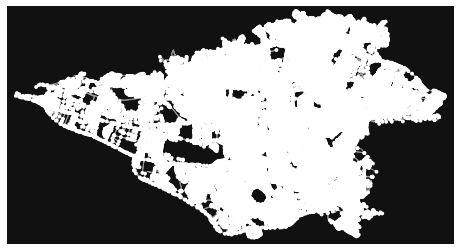

In [6]:
fig,ax = ox.plot_graph(G)

In [14]:
home = (35.69439, 51.42151)
G2 = ox.graph_from_point(home, dist=2000,network_type='drive')

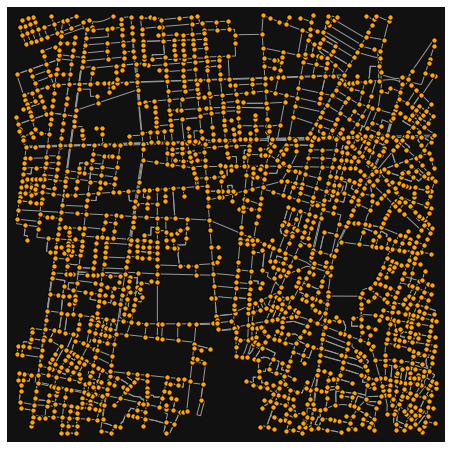

In [15]:
G2 = ox.project_graph(G2)
G2_clean = ox.consolidate_intersections(G2, tolerance=15, dead_ends=False)
#points = np.array([point.xy for point in intersections])
#G2_clean = ox.clean_intersections_graph(G2, tolerance=5, dead_ends=False)
fig, ax = ox.plot_graph(G2_clean, node_color='orange',
node_size=30, node_zorder=2, node_edgecolor='k')

In [16]:
list(G2_clean.nodes)[:5]

[0, 1, 2, 3, 4]

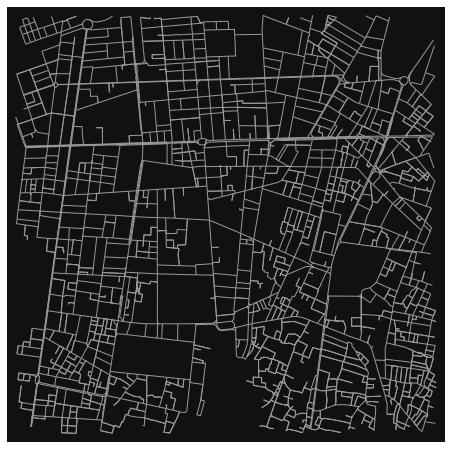

0 [1, 2, 861, 206, 16]
861 [663, 0, 209]
0 [1, 2, 861, 206, 16]
2 [911]
911 [861, 656]
861 [663, 0, 209]
209 [210, 211, 212]
212 [209, 898]
898 [899, 212, 900]
212 [209, 898]
898 [899, 212, 900]
899 [671]
671 [672, 897]
672 [554]


IndexError: Cannot choose from an empty sequence

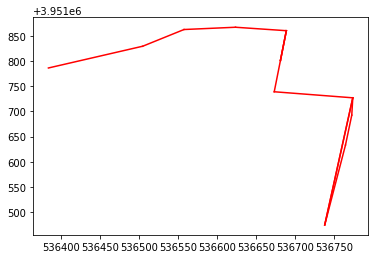

In [18]:
def draw_random_walk(G,ax,loc,delay,steps):
    visited = {loc:1}
    edges = []
    
    for step in range(steps):
        neighbors = [z for z in G.neighbors(loc)]
        # choose where to go
        new_loc = random.choice(neighbors)
        #print(loc,neighbors)
        plt.plot([G.nodes[loc]['x'],G.nodes[new_loc]['x']],
                [G.nodes[loc]['y'],G.nodes[new_loc]['y']],color='red')
        edges.append([[G.nodes[loc]['x'],G.nodes[new_loc]['x']],[G.nodes[loc]['y'],G.nodes[new_loc]['y']]])
        loc = new_loc
        if loc in visited:
            visited[loc] += 1
        else:
            visited[loc] = 1         
    
    return pd.Series(visited), edges
    
fig, ax = ox.plot_graph(G2_clean,node_color='red',node_size=0, node_zorder=2, node_edgecolor='k',show=True)
start = 0
freqs = draw_random_walk(G2_clean,ax,start,1,50)

for loc in freqs.index:
    ax.scatter(x=G2_clean.nodes[loc]['x'],y=G2_clean.nodes[loc]['y'],s=freqs[loc]**2,marker='o',alpha=.75,color='red')
    
_ = ax.scatter(x=G2_clean.nodes[start]['x'],y=G2_clean.nodes[start]['y'],s=100,marker='x',color='black',zorder=3)

In [25]:
GB = ox.graph_from_place('Tehran, Iran', network_type='walk')

In [26]:
GB = ox.project_graph(GB)
GB_clean = ox.consolidate_intersections(GB, tolerance=15, dead_ends=False)

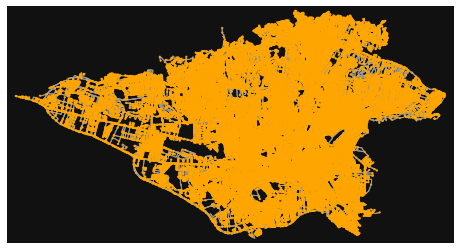

In [27]:
fig, ax = ox.plot_graph(GB_clean, node_color='orange',
node_size=5, node_zorder=2,edge_linewidth=1)

nl = list(GB_clean.nodes)

for i in range(10):
    loc = random.choice(nl)
    _ = ax.scatter(x=GB_clean.nodes[loc]['x'],y=GB_clean.nodes[loc]['y']
                   ,s=100,marker='x',color='black',zorder=3,label=loc)
    ax.annotate(loc, (GB_clean.nodes[loc]['x'], GB_clean.nodes[loc]['y']))

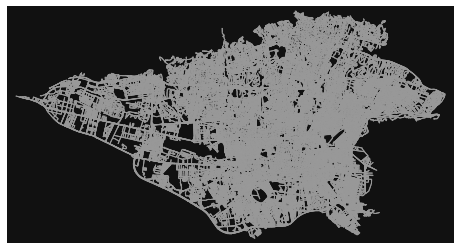

21222 [24817, 21221, 21220, 2571]
21221 [41915, 21220, 21222, 119, 33378, 33379]
119 [118, 21221, 9883]
9883 [21120, 121, 21098, 119]
21120 [21121, 21122, 24816, 9883, 21165]
21121 [21120, 21169]
21120 [21121, 21122, 24816, 9883, 21165]
24816 [24817, 21120, 43825, 24818, 21166]
21166 [24818, 24816, 21146]
24818 [31542, 24816, 21166]
21166 [24818, 24816, 21146]
24818 [31542, 24816, 21166]
31542 [31543, 2571, 24818]
31543 [31542, 31549]
31549 [31543, 31555, 31556]
31555 [31549, 31564]
31549 [31543, 31555, 31556]
31543 [31542, 31549]
31542 [31543, 2571, 24818]
24818 [31542, 24816, 21166]
24816 [24817, 21120, 43825, 24818, 21166]
24817 [21222, 24816, 43825]
43825 [24816, 24817, 31586]
24816 [24817, 21120, 43825, 24818, 21166]
21120 [21121, 21122, 24816, 9883, 21165]
21165 [21146, 21145, 21120]
21146 [21165, 9885, 21166]
21166 [24818, 24816, 21146]
21146 [21165, 9885, 21166]
9885 [120, 2571, 21145, 21146]
120 [9885, 118, 2571]
9885 [120, 2571, 21145, 21146]
120 [9885, 118, 2571]
2571 [2570,

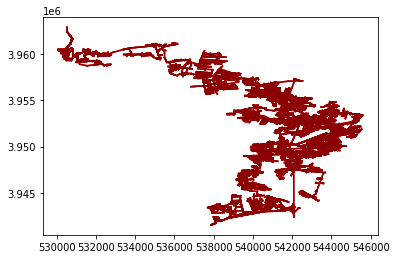

In [29]:
import os
seed = 7
n_steps = 25000
snap_freq = 25
random.seed(seed)


# create folder                        
image_dir = os.path.join(r'Projects\Tehran',str(seed))
Path(image_dir).mkdir(parents=True, exist_ok=True)

# initial figure
fig, ax = ox.plot_graph(GB_clean, node_color='red',
node_size=0, node_zorder=2, node_edgecolor='k',show=True)

# run the random walk
start =random.choice(list(GB_clean.nodes))
freqs,edges = draw_random_walk(GB_clean,ax,start,1,n_steps)

# starting point
_ = ax.scatter(x=GB_clean.nodes[start]['x'],y=GB_clean.nodes[start]['y'],s=100,marker='x',color='black',zorder=3)

# edges
i = 0
for edge in edges:
    if (i % snap_freq) == 0:
        fig.savefig(os.path.join(image_dir,'_'.join(
            [str(seed),str(i).rjust(int(np.log10(n_steps))+1,'0')+'.png'])))
    plt.plot(edge[0],edge[1], color='darkred')
    i += 1

# plot the hotspots
# for loc in freqs.index:
#     ax.scatter(x=GB_clean.nodes[loc]['x'],y=GB_clean.nodes[loc]['y'],
#                s=5./np.sqrt(n_steps)*freqs[loc]**2,marker='o',alpha=.5,color='darkred')

fig.savefig(os.path.join(image_dir,'_'.join([str(seed),str(i),'.png'])))

In [30]:
cwd = os.getcwd()
os.chdir(image_dir)
os.system('magick -delay 5 -loop 0 *.png animated.gif')
os.chdir(cwd)

In [31]:
os.chdir(image_dir)
os.getcwd()

'/home/trottdw/Desktop/osmnx-examples-main/notebooks/Projects\\Tehran/7'

In [32]:
'magick -delay 5 -loop 0 '+image_dir+'*.png animated.gif'

'magick -delay 5 -loop 0 Projects\\Tehran/7*.png animated.gif'